In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 19W-SCn-b7a7BQ6XEOk4Yaey7FLELqlV8

Downloading...
From: https://drive.google.com/uc?id=19W-SCn-b7a7BQ6XEOk4Yaey7FLELqlV8
To: /content/loan.csv
100% 9.16k/9.16k [00:00<00:00, 20.7MB/s]


In [ ]:
df = pd.read_csv('loan.csv')
df.shape

(200, 3)

In [ ]:
df.head()

,x1,x2,y
0,3.729417,6.694052,rejected
1,6.282660,1.952843,approved
2,5.524101,2.296845,approved
3,-0.248258,5.732238,rejected
4,1.738760,4.701953,rejected


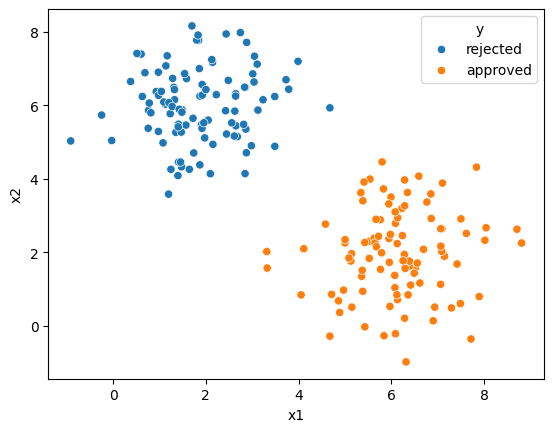

In [ ]:
sns.scatterplot(x="x1",y="x2", data=df, hue='y')
plt.show()

In [ ]:
def dist_from_hyperplane(w, w0, x):
  return (np.dot(w.T, x) + w0) / np.linalg.norm(w);


In [ ]:
def transform(x):
  if x == "rejected":
    return 1
  return -1

In [ ]:
df['y'] = df['y'].apply(transform)

In [ ]:
x = df.drop('y', axis=1).values
y = df['y'].values

x[:5]

array([[ 3.72941743,  6.69405227],
       [ 6.28266031,  1.95284309],
       [ 5.52410061,  2.29684453],
       [-0.24825777,  5.73223814],
       [ 1.73875952,  4.70195336]])

In [ ]:
y[:5]

array([ 1, -1, -1,  1,  1])

In [ ]:
# Step 1: Randorandomly initializing line
w = np.random.normal(size=(2,))
w0 = np.random.normal()

print(w, w0)

[-0.50351039 -0.25057406] 0.4349614663551517


In [ ]:
x1 = np.array([0, 8])
x2 = (-w[0]*x1-w0)/w[1]

<Axes: >

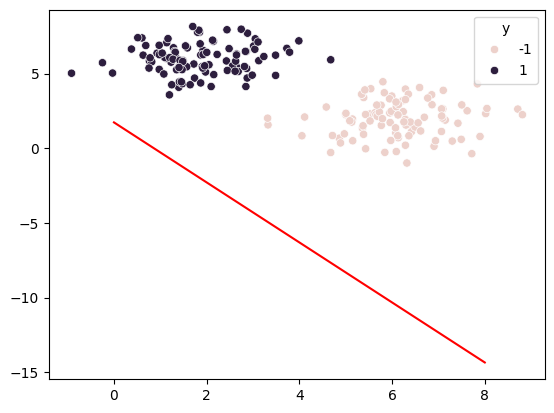

In [ ]:
plt.plot(x1, x2, 'r')
sns.scatterplot(x=x[:, 0], y=x[:, 1], data=df, hue='y')

In [ ]:
def show(w, w0, x, y):
  x1 = np.array([0, 8])
  x2 = (-w[0]*x1-w0)/w[1]
  plt.plot(x1, x2, 'r')
  sns.scatterplot(x=x[:, 0], y=x[:, 1], data=df, hue='y')
  plt.show()

In [ ]:
def perceptron_learning(x, y, w, w0, num_itr = 100):
  for itr in range(num_itr):
    print(" Numb of Itr", itr)
    miss_classified_points = 0
    for i in range(x.shape[0]):
      xi = x[i]
      yi = y[i]

      dist = dist_from_hyperplane(w, w0, xi)
      predicted_sign = np.sign(dist)
      if predicted_sign != yi:
        # this is miss classified point
        # this is update equation
        miss_classified_points += 1
        w = w + (xi*yi)
        w0 = w0 + yi
    print("Totla miss classified points: ", miss_classified_points)
    if miss_classified_points == 0:
            return w, w0
  return w, w0



In [ ]:
w_best, w0_best = perceptron_learning(x, y, w, w0)

 Numb of Itr 0
Totla miss classified points:  6
 Numb of Itr 1
Totla miss classified points:  0


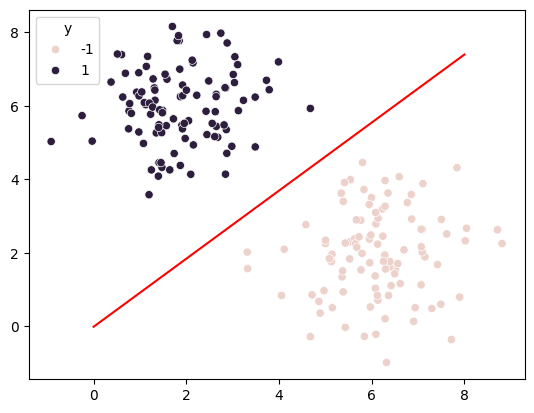

In [ ]:
show(w_best, w0_best, x, y)

In [ ]:
def gain_function(w, w0, x, y):
  all_dist = 0
  for i in range(x.shape[0]):
    dist = dist_from_hyperplane(w,w0,x[i])
    all_dist += np.abs(dist)
  return all_dist/x.shape[0]

print(gain_function(w_best, w0_best, x, y))

2.9151062634929814
